# Classificação da capacidade de pagamento dos municípios brasileiros com base em dados geoeconômicos
# Notebook 03 - XGBClassifier
Autores: Camila, Mario, Cruz

## Importação de bibliotecas e configurações iniciais

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [219]:
#carrega os dados 
df = pd.read_excel('df_sem_target_nan.xlsx')
df.head(2)

,PIB_per_capita,População,Capag,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,Imposto_Prod_Percapita,Região_Nordeste,Região_Norte,...,Hier_Urbana_princ_categ_Centro de Zona,Hier_Urbana_princ_categ_Metrópole,Região_rural_Centro Sub-regional,Região_rural_Centro de zona,Região_rural_Grande Metrópole Nacional,Região_rural_Metrópole,Região_rural_Metrópole Nacional,Amazônia_Legal_Sim,Semiárido_Sim,Cid_Região_São_Paulo_Sim
0,23206,106168,0,0.15,0.47,0.31,0.07,"2,376.05",0,1,...,0,0,0,0,0,0,0,1,0,0
1,25837,5438,0,0.04,0.19,0.31,0.46,"1,039.17",0,1,...,0,0,0,0,0,0,0,1,0,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4418 entries, 0 to 4417
Data columns (total 71 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PIB_per_capita                                      4418 non-null   int64  
 1   População                                           4418 non-null   int64  
 2   Capag                                               4418 non-null   int64  
 3   VAB_Indústria/Total                                 4418 non-null   float64
 4   VAB_Serviço/Total                                   4418 non-null   float64
 5   VAB_Adm/Total                                       4418 non-null   float64
 6   VAB_Agricultura/Total                               4418 non-null   float64
 7   Imposto_Prod_Percapita                              4418 non-null   float64
 8   Região_Nordeste                                     4418 non-null   int64  
 9

In [221]:
# Separação em inputs e outputs
X, y = df.drop(['Capag'], axis = 1), df['Capag']
print(X.shape, y.shape)

(4418, 70) (4418,)


In [222]:
y.isna().sum()

0

In [223]:
# Determinação de variáveis categóricas e numéricas
#df.columns
df['Capag'].head()

0    0
1    0
2    1
3    0
4    0
Name: Capag, dtype: int64

In [224]:
# Verificar target
y.value_counts()

1    2228
0    2190
Name: Capag, dtype: int64

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3534, 70), (884, 70), (3534,), (884,))

# Randomized/Grid Search
Referência: https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [148]:
 rng = np.random.RandomState(0)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3534, 70), (884, 70), (3534,), (884,))

In [230]:
clf = XGBClassifier()

In [231]:
#Este é o dicionário de parâmetros utilizado para o Grid search com 100 iterações.
#Após obter o resultado, fizemos a versão abaixo com os parâmetros ótimos.
##param_grid = {
  #  'max_depth': range(3,7,1),
   # 'subsample':range(10,80,10),
    #'tree_method': ['hist'],
    #'random_state': range(20000, 38000,1),
    #'max_delta_step': [1],
    #'subsample':[0.65]
#}

In [232]:
param_grid = {
    'max_depth': [6],
    'tree_method': ['hist'],
    'random_state': [27889],
    'max_delta_step': [1],
    'subsample':[0.65]
}

In [233]:
search = RandomizedSearchCV(clf,
                            param_distributions=param_grid,
                            cv=10,
                            n_iter = 1
                           )  
search.fit(X, y) 

print(f"Best params:")  
print(search.best_params_)

Best params:
{'tree_method': 'hist', 'subsample': 0.65, 'random_state': 27889, 'max_depth': 6, 'max_delta_step': 1}


In [234]:
# Métricas do conjunto de treino
print(metrics.classification_report(y_train, search.predict(X_train), target_names=['0','1']))
print ("Acurácia de Previsão de Treino:", accuracy_score(y_train, search.predict(X_train)))
plt.savefig('acuracia_previsao_treino.jpg',bbox_inches='tight', dpi = 100)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1775
           1       0.95      0.94      0.95      1759

    accuracy                           0.95      3534
   macro avg       0.95      0.95      0.95      3534
weighted avg       0.95      0.95      0.95      3534

Acurácia de Previsão de Treino: 0.9459535936615733


<Figure size 432x288 with 0 Axes>

In [235]:
# Métricas do conjunto de teste
print(metrics.classification_report(y_test, search.predict(X_test), target_names=['0','1']))
print ("Acurácia de Previsão de Teste:", accuracy_score(y_test, search.predict(X_test)))

# Alarme
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       415
           1       0.96      0.96      0.96       469

    accuracy                           0.95       884
   macro avg       0.95      0.95      0.95       884
weighted avg       0.95      0.95      0.95       884

Acurácia de Previsão de Teste: 0.9536199095022625


## Matriz de Confusão

### Base de teste

In [209]:
#matriz de confusão conjunto de teste
cnf_matrix =  metrics.confusion_matrix(y_test, search.predict(X_test))
cnf_matrix

array([[395,  20],
       [ 21, 448]], dtype=int64)

In [206]:
#matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


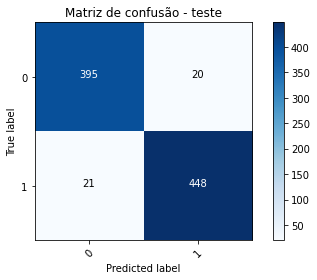

In [213]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão - teste', normalize=False)

### Base de treino

In [214]:
cnf_matrix =  metrics.confusion_matrix(y_train, search.predict(X_train))
cnf_matrix

array([[1691,   84],
       [ 107, 1652]], dtype=int64)

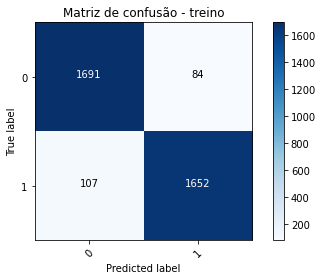

In [215]:
#visualizando a matriz de confusão
plot_confusion_matrix(cnf_matrix,classes =['0', '1'],
                      title='Matriz de confusão - treino', normalize=False)

## Salvar o modelo para produção e utilização futura

In [155]:
import pickle

In [156]:
# save the model to disk
filename = 'modelo_randomizedsearch_xgboost_capag.pkl'
pickle.dump(search, open(filename, 'wb'))

In [168]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                         

# Utilização do modelo para prever todos os casos
Serão incluídos inclusive os casos em que não havia target calculado, e que não foram utilizados para ajustar o modelo.

In [169]:
# df_completo é o modelo com a engenharia de variáveis criadas, com muitas variáveis dummies. Será usado para previsão dos casos não calculados.
df_completo = pd.read_excel('df_completo.xlsx')
df_streamlit = pd.read_excel('df_streamlit.xlsx')

In [170]:
df_completo.shape, df_streamlit.shape

((5570, 71), (5570, 21))

In [171]:
# Separação em inputs e outputs
X_completo, y_completo = df_completo.drop(['Capag'], axis = 1), df_completo['Capag']
print(X_completo.shape, y_completo.shape)

(5570, 70) (5570,)


In [172]:
#  Abaixo estamos convertendo a variável Capag para o tipo de dados integer, criando nova variável
# Capag_real igual a Capag e eliminando a variável Capag
# A razão de termos alterado o nome da variável é para facilitar o entendimento pelo usuário após
# o cálculo e junção da variável Capag_predito.
df_streamlit['Capag'] = df_streamlit['Capag'].astype('Int64')
df_streamlit['Capag_real'] = df_streamlit['Capag']
df_streamlit = df_streamlit.drop(['Capag'], axis = 1)

In [173]:
# Previsão do valor de y
df_streamlit['Capag_predito'] = loaded_model.predict(X_completo)

In [184]:
df_streamlit.head(3)

,Município,Região,UF,Reg_Metropolitana,Mun_Reg_Geog_Imediata,Mun_Reg_Geog_Intermediária,Tipo_Conc_Urbana,Hierarquia_Urbana,Hier_Urbana_princ_categ,Região_rural,...,Cid_Região_São_Paulo,PIB_per_capita,VAB_Indústria/Total,VAB_Serviço/Total,VAB_Adm/Total,VAB_Agricultura/Total,População,Imposto_Prod_Percapita,Capag_real,Capag_predito
0,Alta Floresta D'Oeste,Norte,Rondônia,Não,do Entorno,do Entorno,NaN,Centro Local,Centro Local,Região Rural de Capital Regional,...,Não,21552,0.06,0.26,0.33,0.35,23167,"1,219.88",<NA>,0
1,Ariquemes,Norte,Rondônia,Não,Polo,do Entorno,NaN,Centro Subregional B,Centro Subregional,Região Rural de Capital Regional,...,Não,23206,0.15,0.47,0.31,0.07,106168,"2,376.05",0,0
2,Cabixi,Norte,Rondônia,Não,do Entorno,do Entorno,NaN,Centro Local,Centro Local,Região Rural de Capital Regional,...,Não,25837,0.04,0.19,0.31,0.46,5438,"1,039.17",0,0


In [175]:
df_streamlit.to_csv('C:/Users/xxx/df_streamlit_com_previsao5.csv')

In [176]:
df_streamlit.columns

Index(['Município', 'Região', 'UF', 'Reg_Metropolitana',
       'Mun_Reg_Geog_Imediata', 'Mun_Reg_Geog_Intermediária',
       'Tipo_Conc_Urbana', 'Hierarquia_Urbana', 'Hier_Urbana_princ_categ',
       'Região_rural', 'Amazônia_Legal', 'Semiárido', 'Cid_Região_São_Paulo',
       'PIB_per_capita', 'VAB_Indústria/Total', 'VAB_Serviço/Total',
       'VAB_Adm/Total', 'VAB_Agricultura/Total', 'População',
       'Imposto_Prod_Percapita', 'Capag_real', 'Capag_predito'],
      dtype='object')

# Criação de arquivo resumido para streamlit

In [180]:
df_streamlit_com_previsao_resumido = df_streamlit[['Município','UF','PIB_per_capita','População','Capag_real','Capag_predito']]

In [185]:
df_streamlit_com_previsao_resumido.head(2)

,Município,UF,PIB_per_capita,População,Capag_real,Capag_predito
0,Alta Floresta D'Oeste,Rondônia,21552,23167,<NA>,0
1,Ariquemes,Rondônia,23206,106168,0,0


In [183]:
df_streamlit_com_previsao_resumido.to_csv('C:/Users/xxx/df_streamlit_com_previsao_resumido6.csv')